In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images2/sample2.jpg
/kaggle/input/image2/sample3.jpg
/kaggle/input/images1/compressed_image.jpg


In [4]:
!pip install paddlepaddle

!pip install paddleocr
!pip install paddleclas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 13.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 9.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.5 MB/s eta 0:00:0000:0100:01
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114248 sha256=0f6601fae7fe330c21e3309dd3b43a20dfa6fbb2fb6fdb7141c1da1497e84f10
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 8.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 27.3 MB/s eta 0:00:00:00:0100:01

In [5]:
from paddleocr import PaddleOCR


In [6]:
ocr = PaddleOCR()
print(ocr)

download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_det_infer.tar to /root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer/ch_PP-OCRv4_det_infer.tar


100%|██████████| 4.89M/4.89M [00:16<00:00, 299kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer/ch_PP-OCRv4_rec_infer.tar


100%|██████████| 11.0M/11.0M [00:18<00:00, 591kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:15<00:00, 143kiB/s] 

[2024/10/15 18:46:03] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

In [7]:
import os
from PIL import Image,ImageDraw,ImageFont
import json
from uuid import uuid4
import numpy as np


In [8]:


ocr = PaddleOCR(use_angle_cls=True, 
                det_db_box_thresh=0.2,  # Lower the threshold for more text detection
                det_db_unclip_ratio=2.5,
                lang='en',
                rec = False,
                det_limit_side_len=1536
               )  # Increase unclip ratio to capture more text area






download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:17<00:00, 234kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:17<00:00, 578kiB/s] 

[2024/10/15 18:47:33] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=1536, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.2, det_db_unclip_ratio=2.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_

In [9]:
import cv2
import matplotlib.pyplot as plt

[2024/10/15 18:48:12] ppocr DEBUG: dt_boxes num : 489, elapsed : 0.7867498397827148
[2024/10/15 18:48:13] ppocr DEBUG: cls num  : 489, elapsed : 0.8791775703430176
[2024/10/15 18:48:26] ppocr DEBUG: rec_res num  : 489, elapsed : 13.68482494354248
BOARD OF INTERMEDIATE EDUCATION (A.P.)
1st Year
HYDERABAD
TABULATION REGISTER
COLLEGE:
1400
GOVT COLL W GUNTUR
Dist
GUNTUR
Month
SEPTEMBER
Year 1988
Page No.
002955
REGISTERED
NAME OF THE CANDIDATE
M
PART-1
PART-I
PART-II
NUMBER
E
RESULT
GRAND
D
PAPI
RESULT
PAPI
PAPI
RESULT
RESULT
PAPI
RESULT
PAPI
RESULT
PAPI
RESULT
TOTAL
01
03
37
38
41
42
=
==
==
==
==
==
E
102492
KATYAYANI DEVARAPALLI
1A
46
P
63
P
16
F
14
F
13
F
10
F
162
F
6
01
07
38
41
42
==
==
==
==
==
==
6
E
102493
RUTHSIGMON CHINNAM
1A
40*
P
35*
P
26*
P
22*
P
41
P
22*
P
186
102494
E
DAMMALAPATI V R LAKSHMI
1A
35*
35*
P
P
23*
P
27
P
26
P
33
P
179
P
E
102490
DEVANASOINA JYOTHI
1A
61*
*0
P
31*
P
30*
P
40
25*
P
257
P
E
102497
SHAIK SHAKEELA
1A
36*
49*
P
25
P
23
P
30
28
P
191
P
E
102499
P PUS

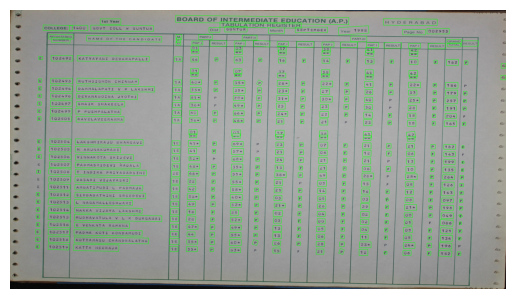

In [10]:

# Import necessary libraries



# Initialize PaddleOCR with the desired language (e.g., 'en' for English)
 # need to run only once to download model weights

# Load an image
image_path = "/kaggle/input/image2/sample3.jpg" # Replace with your image path
img = cv2.imread(image_path)



# Use PaddleOCR to perform OCR on the image
results = ocr.ocr(image_path, cls=True)

# Display results
for line in results:
    for word_info in line:
        print(word_info[1][0])  # Print the detected text

# Optional: Display the image with bounding boxes
for line in results:
    for word_info in line:
        box = word_info[0]  # Get the bounding box
        cv2.polylines(img, [np.array(box).astype(int)], isClosed=True, color=(0, 255, 0), thickness=2)

# Show the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



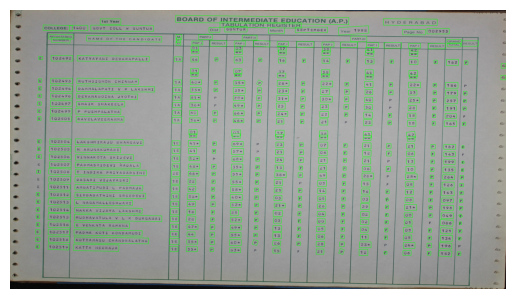

In [11]:

# Process results and prepare for JSON output
output = []
for line in results:
    for word_info in line:
        text = word_info[1][0]  # Detected text
        confidence = word_info[1][1]  # Confidence score
        box = word_info[0]  # Bounding box
        output.append({
            "text": text,
            
        })

# Save output to JSON file
with open('ocr_output3.json', 'w') as json_file:
    json.dump(output, json_file, indent=4)

# Optional: Display the image with bounding boxes
for line in results:
    for word_info in line:
        box = np.array(word_info[0]).astype(int)
        cv2.polylines(img, [box], isClosed=True, color=(0, 255, 0), thickness=2)

# Show the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [12]:
# Save the image with bounding boxes
output_image_path = 'ocr_output_with_boxes4.png'
cv2.imwrite(output_image_path, img)
print(f"Image saved as '{output_image_path}'")

Image saved as 'ocr_output_with_boxes4.png'


In [13]:
!pip install pandas openpyxl

!pip install pandas openpyxl

In [19]:

import pandas as pd

import json

# Load the JSON file
with open('ocr_output3.json', 'r') as json_file:
    data = json.load(json_file)

# Check if data is a list or dict and process accordingly
if isinstance(data, dict):
    df = pd.json_normalize(data['ocr_results'])
else:
    df = pd.DataFrame(data)  # Assuming data is a list

# Save to Excel
df.to_excel('ocr_output3.xlsx', index=False)



In [22]:
from collections import defaultdict

testing